In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns 

In [2]:
match = pd.read_csv('Match.csv')
player = pd.read_csv('Player.csv')
stats = pd.read_csv('Stats.csv')
player['count'] = 0
match_results = pd.DataFrame()


In [3]:
match.head()

,match_id,round,date,avg_minutes_game,avg_seconds_point,avg_minutes_set,tournament,year,match_minutes
0,m_2019_A_0,1st Round,2019-01-14,4.81,46.8,43.3,Australian Open,2019,173.0
1,m_2019_A_1,1st Round,2019-01-14,3.95,35.7,40.5,Australian Open,2019,162.0
2,m_2019_A_2,1st Round,2019-01-14,4.86,42.3,43.8,Australian Open,2019,175.0
3,m_2019_A_3,1st Round,2019-01-14,4.43,43.3,41.0,Australian Open,2019,164.0
4,m_2019_A_4,1st Round,2019-01-14,4.37,39.7,43.7,Australian Open,2019,131.0


In [4]:
stats.head()

,match_id,player_id,pts,rank,winner,sets,1,2,3,4,...,service_pts,return_pts,aces,bp_saved,bp_faced,first_serve_rtn_won,second_serve_rtn_won,first_serve_in,dbl_faults,first_serve_per
0,m_2019_A_0,atp_104731,4810.0,6.0,True,3.0,6.0,5.0,6.0,6.0,...,73.0,51.0,14.0,5.0,7.0,29.0,22.0,71.0,5.0,0.645455
1,m_2019_A_1,atp_105932,1820.0,20.0,True,3.0,6.0,4.0,7.0,6.0,...,92.0,50.0,11.0,10.0,15.0,17.0,33.0,90.0,9.0,0.620690
2,m_2019_A_2,atp_105430,585.0,98.0,True,3.0,3.0,6.0,6.0,6.0,...,73.0,59.0,10.0,8.0,13.0,27.0,32.0,90.0,1.0,0.720000
3,m_2019_A_3,atp_105882,401.0,137.0,True,3.0,6.0,6.0,6.0,6.0,...,82.0,45.0,23.0,5.0,6.0,16.0,29.0,63.0,3.0,0.543103
4,m_2019_A_4,atp_104269,1410.0,28.0,True,3.0,7.0,6.0,6.0,NaN,...,63.0,47.0,21.0,1.0,2.0,29.0,18.0,58.0,6.0,0.666667


In [5]:
player.head()

,player_id,fullname,hand,country,birthday,count
0,atp_100001,Gardnar Mulloy,R,USA,1913-11-22,0
1,atp_100003,Frank Sedgman,R,AUS,1927-10-02,0
2,atp_100004,Giuseppe Merlo,R,ITA,1927-10-11,0
3,atp_100005,Richard Pancho Gonzales,R,USA,1928-05-09,0
4,atp_100006,Grant Golden,R,USA,1929-08-21,0


In [6]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10160 entries, 0 to 10159
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   match_id           10160 non-null  object 
 1   round              10160 non-null  object 
 2   date               10160 non-null  object 
 3   avg_minutes_game   10114 non-null  float64
 4   avg_seconds_point  10115 non-null  float64
 5   avg_minutes_set    10078 non-null  float64
 6   tournament         10160 non-null  object 
 7   year               10160 non-null  int64  
 8   match_minutes      10117 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 714.5+ KB


In [7]:
aus_matches = match[match["tournament"]=='US Open']

In [8]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20240 entries, 0 to 20239
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              20240 non-null  object 
 1   player_id             20240 non-null  object 
 2   pts                   14398 non-null  float64
 3   rank                  20230 non-null  float64
 4   winner                20240 non-null  bool   
 5   sets                  20236 non-null  float64
 6   1                     20236 non-null  float64
 7   2                     20107 non-null  float64
 8   3                     19818 non-null  float64
 9   4                     9898 non-null   float64
 10  5                     3724 non-null   float64
 11  avg_odds              9852 non-null   float64
 12  max_odds              9852 non-null   float64
 13  total_pts             20234 non-null  float64
 14  service_pts           20234 non-null  float64
 15  return_pts         

In [9]:
merge_match_stats = pd.merge(left=aus_matches, right=stats, left_on='match_id', right_on='match_id')

In [10]:
merge_match_stats[["match_id","player_id","winner","tournament","sets","year"]]

,match_id,player_id,winner,tournament,sets,year
0,m_2019_U_0,atp_105583,True,US Open,3.0,2019
1,m_2019_U_0,atp_104327,False,US Open,0.0,2019
2,m_2019_U_1,atp_106426,True,US Open,3.0,2019
3,m_2019_U_1,atp_111153,False,US Open,2.0,2019
4,m_2019_U_2,atp_106045,True,US Open,3.0,2019
...,...,...,...,...,...,...
5053,m_2000_U_124,atp_101774,False,US Open,0.0,2000
5054,m_2000_U_125,atp_101948,True,US Open,3.0,2000
5055,m_2000_U_125,atp_103720,False,US Open,0.0,2000
5056,m_2000_U_126,atp_103498,True,US Open,3.0,2000


In [11]:
merge_player = pd.merge(left=merge_match_stats, right=player, left_on='player_id', right_on='player_id')

In [12]:
merge_player[["match_id","player_id","fullname","winner","country","tournament","sets","date","year","count"]]

,match_id,player_id,fullname,winner,country,tournament,sets,date,year,count
0,m_2019_U_0,atp_105583,Dusan Lajovic,True,SRB,US Open,3.0,2019-08-26,2019,0
1,m_2019_U_73,atp_105583,Dusan Lajovic,False,SRB,US Open,1.0,2019-08-29,2019,0
2,m_2018_U_16,atp_105583,Dusan Lajovic,True,SRB,US Open,3.0,2018-08-27,2018,0
3,m_2018_U_72,atp_105583,Dusan Lajovic,True,SRB,US Open,3.0,2018-08-29,2018,0
4,m_2018_U_100,atp_105583,Dusan Lajovic,False,SRB,US Open,1.0,2018-08-31,2018,0
...,...,...,...,...,...,...,...,...,...,...
5053,m_2000_U_55,atp_101945,Thierry Guardiola,False,FRA,US Open,1.0,2000-08-28,2000,0
5054,m_2000_U_59,atp_102205,Sebastien Lareau,False,CAN,US Open,0.0,2000-08-28,2000,0
5055,m_2000_U_60,atp_102548,Juan Antonio Marin,False,CRC,US Open,0.0,2000-08-28,2000,0
5056,m_2000_U_61,atp_101727,Jason Stoltenberg,True,AUS,US Open,3.0,2000-08-28,2000,0


In [13]:
merge_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5058 entries, 0 to 5057
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              5058 non-null   object 
 1   round                 5058 non-null   object 
 2   date                  5058 non-null   object 
 3   avg_minutes_game      5054 non-null   float64
 4   avg_seconds_point     5054 non-null   float64
 5   avg_minutes_set       5044 non-null   float64
 6   tournament            5058 non-null   object 
 7   year                  5058 non-null   int64  
 8   match_minutes         5058 non-null   float64
 9   player_id             5058 non-null   object 
 10  pts                   3789 non-null   float64
 11  rank                  5057 non-null   float64
 12  winner                5058 non-null   bool   
 13  sets                  5058 non-null   float64
 14  1                     5058 non-null   float64
 15  2                    

In [14]:
merge_player_w = merge_player[merge_player.winner==True]
merge_player_l = merge_player[merge_player.winner==False]

In [15]:
us_win = merge_player_w[['tournament','fullname','count']]
us_lose = merge_player_l[['tournament','fullname','count']]

In [16]:
us_win

,tournament,fullname,count
0,US Open,Dusan Lajovic,0
2,US Open,Dusan Lajovic,0
3,US Open,Dusan Lajovic,0
10,US Open,Steve Darcis,0
12,US Open,Steve Darcis,0
...,...,...,...
5037,US Open,Hernan Gumy,0
5041,US Open,Jens Knippschild,0
5044,US Open,Petr Kralert,0
5048,US Open,Daniel Nestor,0


In [17]:
us_win = us_win.groupby(['tournament', 'fullname']).count()
us_win = us_win.reset_index()
us_win.columns = ['tournament', 'fullname', 'Count_Win']

In [18]:
us_win

,tournament,fullname,Count_Win
0,US Open,Adrian Mannarino,8
1,US Open,Adrian Menendez Maceiras,1
2,US Open,Adrian Voinea,1
3,US Open,Agustin Calleri,6
4,US Open,Albert Costa,6
...,...,...,...
379,US Open,Yen Hsun Lu,3
380,US Open,Yevgeny Kafelnikov,10
381,US Open,Yoshihito Nishioka,2
382,US Open,Younes El Aynaoui,8


In [19]:
us_lose = us_lose.groupby(['tournament', 'fullname']).count()
us_lose = us_lose.reset_index()
us_lose.columns = ['tournament', 'fullname', 'Count_Lose']

In [20]:
us_winner = pd.merge(us_win, us_lose, on=['tournament', 'fullname'])

In [21]:
us_winner

,tournament,fullname,Count_Win,Count_Lose
0,US Open,Adrian Mannarino,8,9
1,US Open,Adrian Menendez Maceiras,1,1
2,US Open,Adrian Voinea,1,2
3,US Open,Agustin Calleri,6,8
4,US Open,Albert Costa,6,6
...,...,...,...,...
379,US Open,Yen Hsun Lu,3,11
380,US Open,Yevgeny Kafelnikov,10,4
381,US Open,Yoshihito Nishioka,2,5
382,US Open,Younes El Aynaoui,8,6


In [22]:
us_winner['total_play'] = us_winner['Count_Win'] + us_winner['Count_Lose']
us_winner['perc_win'] = round(us_winner['Count_Win'] / us_winner['total_play'],4)*100
us_winner = us_winner[us_winner.total_play > 5]

In [23]:
us_winner.sort_values(by='perc_win', ascending=False).head(30)

,tournament,fullname,Count_Win,Count_Lose,total_play,perc_win
287,US Open,Pete Sampras,19,2,21,90.48
276,US Open,Novak Djokovic,72,11,83,86.75
316,US Open,Roger Federer,89,14,103,86.41
299,US Open,Rafael Nadal,64,11,75,85.33
27,US Open,Andre Agassi,28,7,35,80.00
203,US Open,Juan Martin Del Potro,35,9,44,79.55
40,US Open,Andy Murray,45,12,57,78.95
242,US Open,Marin Cilic,36,10,46,78.26
41,US Open,Andy Roddick,43,12,55,78.18
224,US Open,Lleyton Hewitt,45,13,58,77.59


In [24]:
top_us = us_winner[us_winner.tournament == 'US Open'].sort_values(by='perc_win', ascending = False).head(10)


Text(0.5, 1.0, 'Best players in Australian Open')

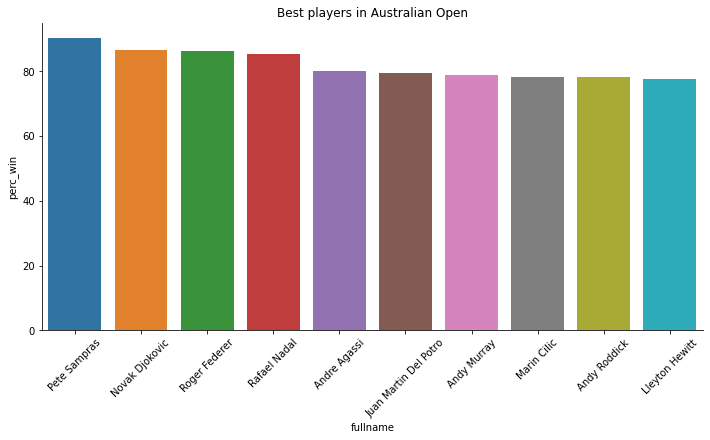

In [25]:
g=sns.catplot(x='fullname', y='perc_win', data=top_us, kind='bar', height=5, aspect=2)
g.set_xticklabels(labels = top_us.fullname,  rotation=45)
plot.title('Best players in Australian Open')

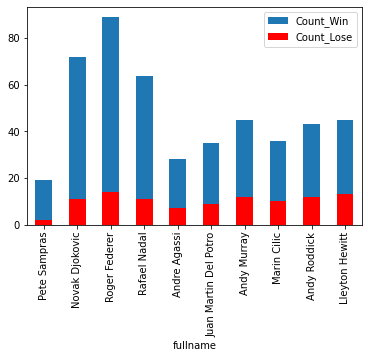

In [26]:
ax = plot.gca()
top_us.plot(x='fullname',y='Count_Win',kind='bar',ax=ax)
top_us.plot(x='fullname',y='Count_Lose',kind='bar',color = 'red',ax=ax)
top_us_win_lose = top_us.copy()

